## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.752932 -1.089827  0.298482 -0.659962  0.830117 -0.512321
1 -0.119667 -0.641046  0.634582  0.823691 -0.404331  0.033815
2  0.506776  0.375986  0.614468 -1.264805 -0.966181 -0.402902
3  1.448265  0.278460  0.120648  1.449730 -0.550575  1.403525
4  0.268775  0.915497  1.317465 -0.693120 -1.836044  0.281047


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9831549	total: 68ms	remaining: 1m 7s
1:	learn: 0.9732198	total: 68.7ms	remaining: 34.3s
2:	learn: 0.9632077	total: 69.3ms	remaining: 23s
3:	learn: 0.9534533	total: 69.9ms	remaining: 17.4s
4:	learn: 0.9441879	total: 70.4ms	remaining: 14s
5:	learn: 0.9348089	total: 71ms	remaining: 11.8s
6:	learn: 0.9228339	total: 71.4ms	remaining: 10.1s
7:	learn: 0.9108026	total: 72ms	remaining: 8.93s
8:	learn: 0.9017444	total: 72.8ms	remaining: 8.02s
9:	learn: 0.8918899	total: 73.3ms	remaining: 7.26s
10:	learn: 0.8821026	total: 73.8ms	remaining: 6.63s
11:	learn: 0.8721604	total: 74.4ms	remaining: 6.12s
12:	learn: 0.8628980	total: 75ms	remaining: 5.7s
13:	learn: 0.8539910	total: 75.5ms	remaining: 5.32s
14:	learn: 0.8459776	total: 76.2ms	remaining: 5s
15:	learn: 0.8365843	total: 76.6ms	remaining: 4.71s
16:	learn: 0.8291962	total: 77.1ms	remaining: 4.46s
17:	learn: 0.8215055	total: 77.7ms	remaining: 4.24s
18:	learn: 0.8140407	total: 78.1ms	remaining: 4.03s
19:	lear

87:	learn: 0.4423586	total: 109ms	remaining: 1.13s
88:	learn: 0.4388414	total: 110ms	remaining: 1.12s
89:	learn: 0.4353896	total: 110ms	remaining: 1.11s
90:	learn: 0.4319109	total: 110ms	remaining: 1.1s
91:	learn: 0.4282756	total: 111ms	remaining: 1.09s
92:	learn: 0.4246527	total: 111ms	remaining: 1.08s
93:	learn: 0.4212709	total: 112ms	remaining: 1.08s
94:	learn: 0.4183119	total: 112ms	remaining: 1.07s
95:	learn: 0.4151414	total: 113ms	remaining: 1.06s
96:	learn: 0.4115234	total: 113ms	remaining: 1.05s
97:	learn: 0.4080981	total: 114ms	remaining: 1.05s
98:	learn: 0.4050715	total: 114ms	remaining: 1.04s
99:	learn: 0.4023248	total: 115ms	remaining: 1.03s
100:	learn: 0.4002812	total: 115ms	remaining: 1.02s
101:	learn: 0.3971412	total: 115ms	remaining: 1.01s
102:	learn: 0.3946663	total: 116ms	remaining: 1.01s
103:	learn: 0.3909313	total: 116ms	remaining: 1s
104:	learn: 0.3887170	total: 117ms	remaining: 993ms
105:	learn: 0.3857159	total: 117ms	remaining: 987ms
106:	learn: 0.3828080	total: 

254:	learn: 0.1519059	total: 187ms	remaining: 547ms
255:	learn: 0.1514395	total: 188ms	remaining: 546ms
256:	learn: 0.1505442	total: 188ms	remaining: 544ms
257:	learn: 0.1497298	total: 189ms	remaining: 543ms
258:	learn: 0.1490730	total: 190ms	remaining: 544ms
259:	learn: 0.1484079	total: 190ms	remaining: 542ms
260:	learn: 0.1476386	total: 191ms	remaining: 540ms
261:	learn: 0.1470251	total: 191ms	remaining: 539ms
262:	learn: 0.1459587	total: 192ms	remaining: 538ms
263:	learn: 0.1452123	total: 192ms	remaining: 536ms
264:	learn: 0.1443667	total: 193ms	remaining: 535ms
265:	learn: 0.1436353	total: 193ms	remaining: 534ms
266:	learn: 0.1428403	total: 194ms	remaining: 532ms
267:	learn: 0.1422325	total: 194ms	remaining: 531ms
268:	learn: 0.1415666	total: 195ms	remaining: 530ms
269:	learn: 0.1409153	total: 195ms	remaining: 528ms
270:	learn: 0.1402623	total: 196ms	remaining: 527ms
271:	learn: 0.1399582	total: 196ms	remaining: 525ms
272:	learn: 0.1393090	total: 197ms	remaining: 524ms
273:	learn: 

472:	learn: 0.0552857	total: 292ms	remaining: 325ms
473:	learn: 0.0552109	total: 293ms	remaining: 325ms
474:	learn: 0.0551369	total: 293ms	remaining: 324ms
475:	learn: 0.0549157	total: 294ms	remaining: 323ms
476:	learn: 0.0546967	total: 294ms	remaining: 323ms
477:	learn: 0.0546253	total: 295ms	remaining: 322ms
478:	learn: 0.0543608	total: 295ms	remaining: 321ms
479:	learn: 0.0542432	total: 296ms	remaining: 320ms
480:	learn: 0.0539746	total: 296ms	remaining: 319ms
481:	learn: 0.0538785	total: 296ms	remaining: 318ms
482:	learn: 0.0535803	total: 297ms	remaining: 318ms
483:	learn: 0.0534860	total: 297ms	remaining: 317ms
484:	learn: 0.0533931	total: 298ms	remaining: 316ms
485:	learn: 0.0531324	total: 298ms	remaining: 315ms
486:	learn: 0.0530410	total: 298ms	remaining: 314ms
487:	learn: 0.0529508	total: 299ms	remaining: 314ms
488:	learn: 0.0526652	total: 299ms	remaining: 313ms
489:	learn: 0.0524837	total: 300ms	remaining: 312ms
490:	learn: 0.0523312	total: 301ms	remaining: 312ms
491:	learn: 

646:	learn: 0.0297210	total: 370ms	remaining: 202ms
647:	learn: 0.0296851	total: 371ms	remaining: 201ms
648:	learn: 0.0295603	total: 371ms	remaining: 201ms
649:	learn: 0.0295249	total: 372ms	remaining: 200ms
650:	learn: 0.0294978	total: 372ms	remaining: 200ms
651:	learn: 0.0293305	total: 373ms	remaining: 199ms
652:	learn: 0.0293036	total: 373ms	remaining: 198ms
653:	learn: 0.0292325	total: 374ms	remaining: 198ms
654:	learn: 0.0290400	total: 374ms	remaining: 197ms
655:	learn: 0.0290139	total: 375ms	remaining: 196ms
656:	learn: 0.0289881	total: 375ms	remaining: 196ms
657:	learn: 0.0288705	total: 376ms	remaining: 195ms
658:	learn: 0.0288452	total: 376ms	remaining: 195ms
659:	learn: 0.0286842	total: 376ms	remaining: 194ms
660:	learn: 0.0285702	total: 377ms	remaining: 193ms
661:	learn: 0.0285452	total: 377ms	remaining: 193ms
662:	learn: 0.0283801	total: 378ms	remaining: 192ms
663:	learn: 0.0282224	total: 378ms	remaining: 191ms
664:	learn: 0.0281126	total: 379ms	remaining: 191ms
665:	learn: 

865:	learn: 0.0135916	total: 476ms	remaining: 73.6ms
866:	learn: 0.0135363	total: 476ms	remaining: 73ms
867:	learn: 0.0135111	total: 477ms	remaining: 72.5ms
868:	learn: 0.0134902	total: 477ms	remaining: 71.9ms
869:	learn: 0.0134800	total: 478ms	remaining: 71.4ms
870:	learn: 0.0134134	total: 478ms	remaining: 70.8ms
871:	learn: 0.0133413	total: 478ms	remaining: 70.2ms
872:	learn: 0.0132857	total: 479ms	remaining: 69.7ms
873:	learn: 0.0132763	total: 480ms	remaining: 69.2ms
874:	learn: 0.0132670	total: 480ms	remaining: 68.6ms
875:	learn: 0.0132578	total: 481ms	remaining: 68.1ms
876:	learn: 0.0132073	total: 481ms	remaining: 67.5ms
877:	learn: 0.0131982	total: 482ms	remaining: 67ms
878:	learn: 0.0131893	total: 482ms	remaining: 66.4ms
879:	learn: 0.0131291	total: 483ms	remaining: 65.8ms
880:	learn: 0.0131141	total: 483ms	remaining: 65.3ms
881:	learn: 0.0130992	total: 484ms	remaining: 64.7ms
882:	learn: 0.0130031	total: 484ms	remaining: 64.2ms
883:	learn: 0.0129419	total: 485ms	remaining: 63.6

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

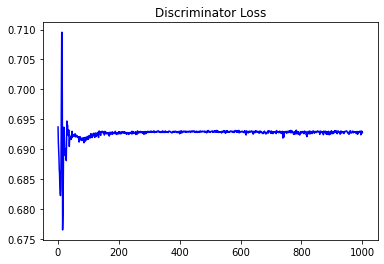

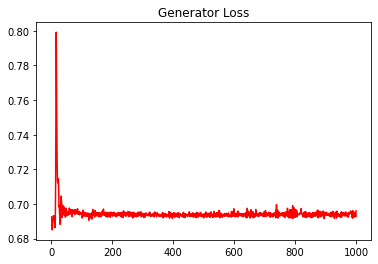

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07294381102664284


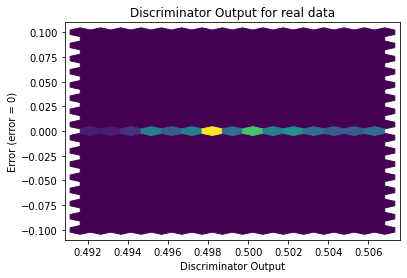

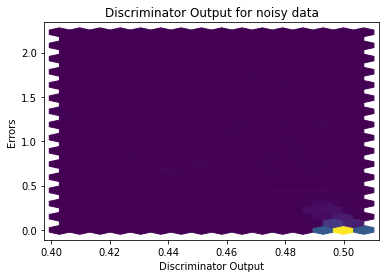

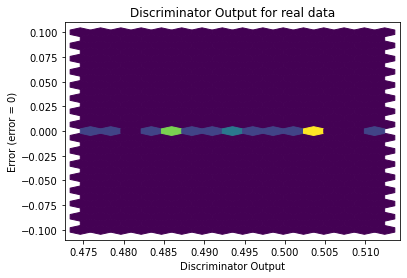

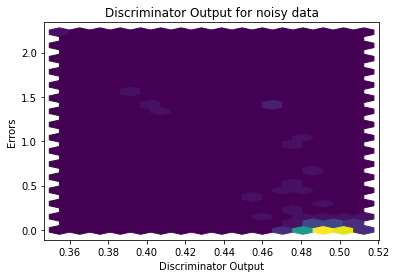

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


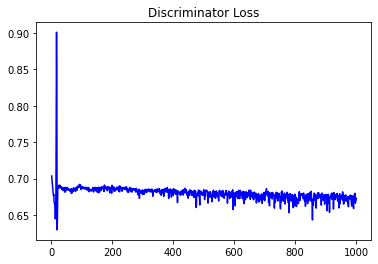

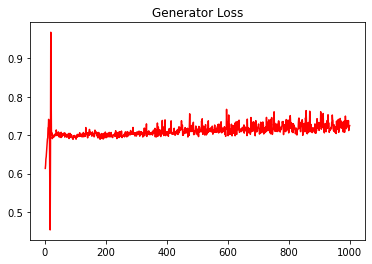

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11130134986588469


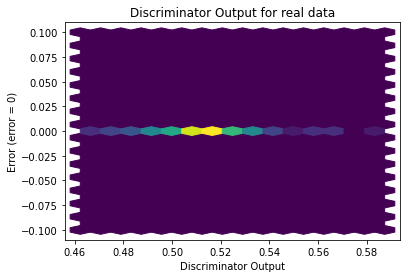

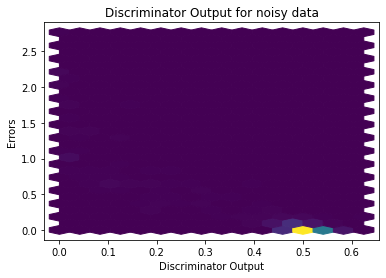

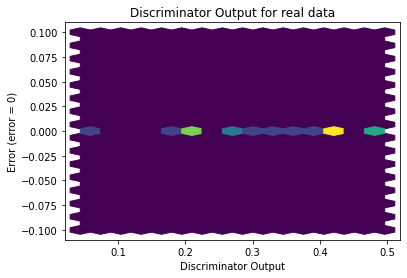

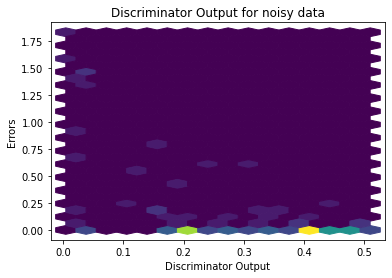

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1105]], requires_grad=True)
